In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
import scipy.stats as st
import matplotlib.mlab as mlab
import math
%matplotlib inline

In [2]:
def bootstrap(arr,n_boots):
    '''
    variables:
        arr = the data that we are random sampling from
        n_boots = the number of bootstraps we want to make
    
    returns:
        list of lists containing the number of bootstrap
        samples we wanted to make
    '''
    return np.array([resample(arr) for _ in xrange(n_boots)])

In [3]:
def bootstrap_means(boots):
    '''
    variables:
        boots = our list of lists of the individual bootstraps
        
    returns:
        list of all of the means of the individual bootstraps
    '''
    return np.array([np.mean(boot) for boot in boots])

In [4]:
df = pd.read_csv('data/Grades-Table 1.csv')

In [5]:
df_f = df[df.Treatment == 'F'] # dataframe of treatment group F
df_t = df[df.Treatment == 'T'] # dataframe of treatment group T

In [6]:
f_grades = np.array(df_f.FINAL_RAW_BASE_GRADE) # list of the final grades for treatment group F
t_grades = np.array(df_t.FINAL_RAW_BASE_GRADE) # list of the final grades for treatment group T

In [24]:
f_boots = bootstrap(f_grades, 100000) # bootstrap samples for treatment group F
t_boots = bootstrap(t_grades, 100000) # bootstrap samples for treatment group T

In [25]:
f_boot_means = bootstrap_means(f_boots) # means of the bootstrap samples for treatment group F
t_boot_means = bootstrap_means(t_boots) # means of the bootstrap samples for treatment group T

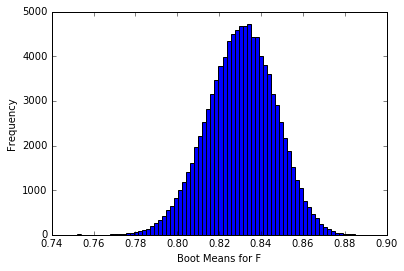

In [26]:
plt.hist(f_boot_means, bins = 75)
plt.xlabel('Boot Means for F')
plt.ylabel('Frequency')

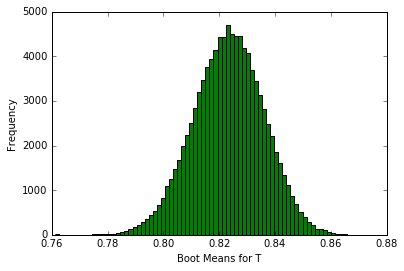

In [27]:
plt.hist(t_boot_means, bins = 75, color = 'g')
plt.xlabel('Boot Means for T')
plt.ylabel('Frequency')

In [28]:
f_std = f_boot_means.std() / np.sqrt(len(f_boot_means)) # std for central limit therom

In [29]:
f_mean = f_boot_means.mean() # the mean of the F bootstrap sample means
t_mean = t_boot_means.mean() # the mean of the T bootstrap sample means

In [30]:
z_f = (f_mean - t_mean) / f_std # z score if we use the f_std

In [31]:
z_f # z score if we use 

140.21258740101126

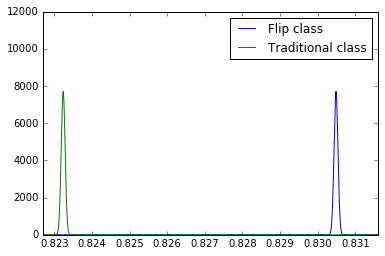

In [67]:
mu_f = f_mean
sigma_f = f_std
x_f = np.linspace(.822, .833, 2000)#(f_boot_means.min(), f_boot_means.max(), 50)
plt.plot(x_f, mlab.normpdf(x_f, mu_f, sigma_f), label = 'Flip class')

mu_t = t_mean
sigma_t = f_std
x_t = np.linspace(.822, .833, 2000)#(t_boot_means.min(), t_boot_means.max(), 50)
plt.plot(x_t, mlab.normpdf(x_t, mu_t, sigma_t), color = 'g', label = 'Traditional class')
plt.legend()
plt.xlim(.8227, .8316)
plt.ylim(0, 12000)
plt.show()

In [22]:
f_mean

0.83027049513406159

In [23]:
t_mean

0.82344122894302985

In [ ]:
df.Section.unique()

In [ ]:
df.Instructor.unique()

In [ ]:
df.Time.unique()

In [ ]:
df.Treatment.unique()

In [ ]:
df.Student.unique()

In [ ]:
len(f_boot_means)